Bank will score debts based on many factors to assess the expected recovery amount.

The higher the score, the more the bank will pursue the debt.
(Higher amount that the bank may be able to receive from the customer in the future.)

Bank has different strategies at different threshold, each level will cost $50 more than the prior level.

Is this worth it?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


EDA
    expected_recovery_amount vs actual_recovery_amount
    recovery_strategy vs recovery_surplus (actual - expected)
    age, sex vs recovery_strategy

In [4]:
# change data types
# recovery_strategy and sex --> category
df.recovery_strategy = df.recovery_strategy.astype('category')
df.sex = df.sex.astype('category')
df.dtypes

id                             int64
expected_recovery_amount       int64
actual_recovery_amount       float64
recovery_strategy           category
age                            int64
sex                         category
dtype: object

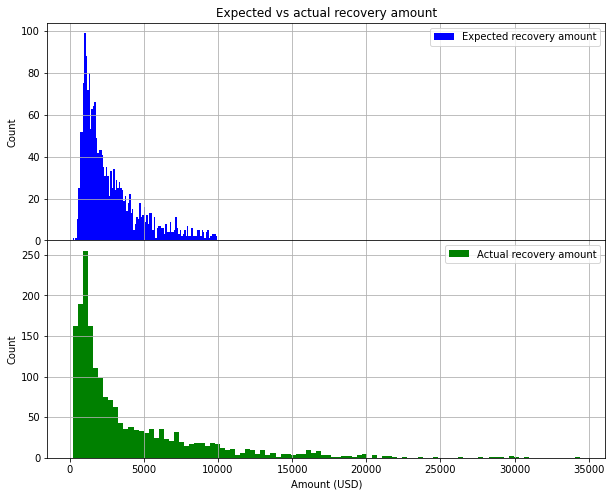

In [5]:
# histograms for expected and actual recovery amount
fig, (ax1, ax2) = plt.subplots(2, figsize =(10,8), sharex=True)

fig.subplots_adjust(hspace=0)

df.expected_recovery_amount.hist(ax=ax1, bins=100, color='blue', label='Expected recovery amount')
df.actual_recovery_amount.hist(ax=ax2, bins=100, color='green', label='Actual recovery amount')

ax1.set(title='Expected vs actual recovery amount', ylabel='Count')
ax2.set(xlabel='Amount (USD)',ylabel='Count')
ax1.legend()
ax2.legend()

plt.show()

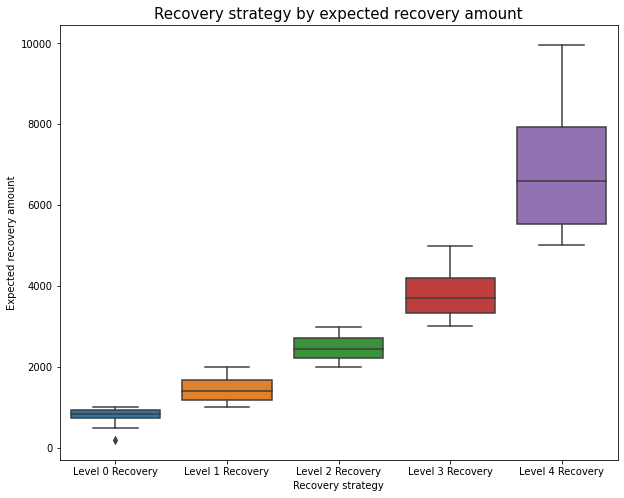

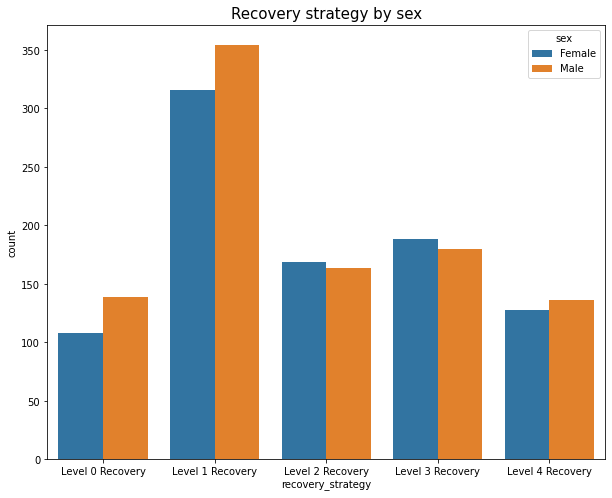

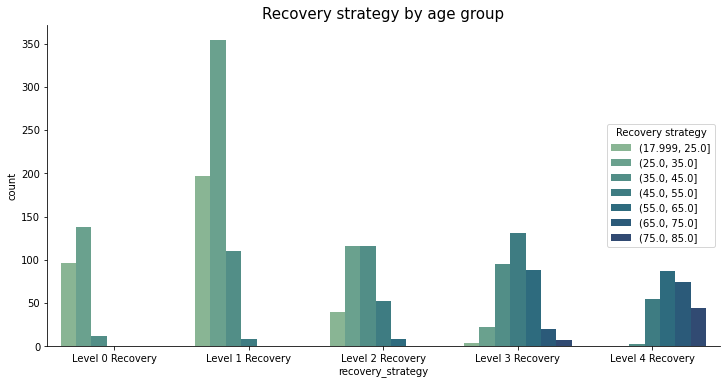

In [54]:
# How do strategies get assigned

# Recovery strategy by expected_recovery_amount
fig, ax = plt.subplots(figsize =(10,8))

sns.boxplot(data=df, y='expected_recovery_amount', x='recovery_strategy', ax=ax)
ax.set_title('Recovery strategy by expected recovery amount', size=15)
ax.set_xlabel('Recovery strategy')
ax.set_ylabel('Expected recovery amount')

plt.show()

# Recovery strategy by sex
fig, ax1 = plt.subplots(figsize =(10,8))
ax1.set_title('Recovery strategy by sex', size=15)
sns.countplot(data=df, x='recovery_strategy', hue='sex', ax=ax1)

plt.show()

# Recovery strategy by age

# categorize age groups
df['age_group'] = pd.cut(df.age, bins=[18,25,35,45,55,65,75,85], include_lowest=True)

sns.catplot(data=df, x='recovery_strategy', hue='age_group', kind='count', legend=False, palette='crest', height=5, aspect=2)
plt.title('Recovery strategy by age group', size=15)
plt.legend(title='Recovery strategy', loc='right')

plt.show()

In [20]:
df.recovery_strategy.value_counts().sort_index()

Level 0 Recovery    247
Level 1 Recovery    670
Level 2 Recovery    333
Level 3 Recovery    368
Level 4 Recovery    264
Name: recovery_strategy, dtype: int64

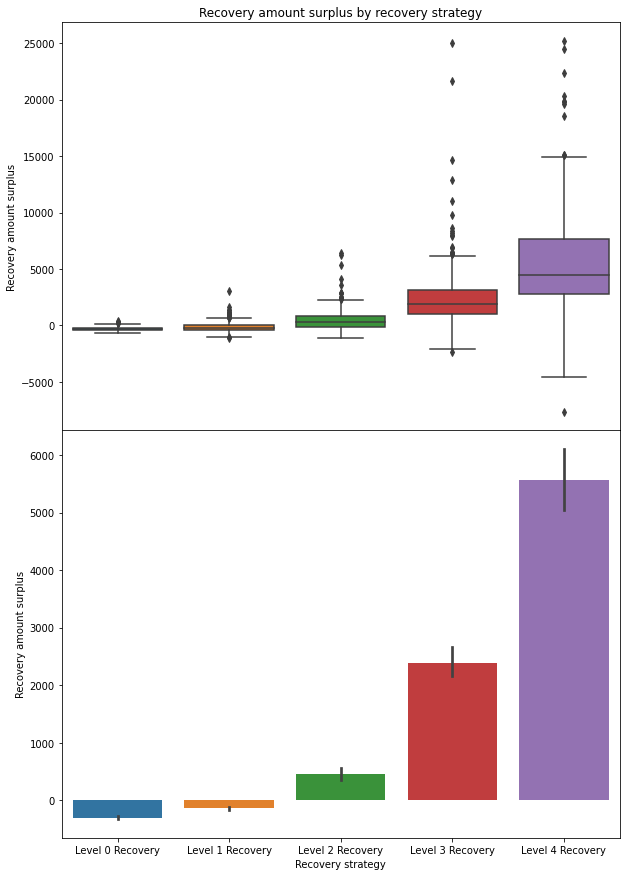

In [24]:
# Do strategies with higher costs get more money back?

# create new cols: recovery_amount_surplus, recovery_cost
df['recovery_amount_surplus'] = df.actual_recovery_amount - df.expected_recovery_amount

fig, (ax3, ax4) = plt.subplots(2, figsize =(10,15), sharex=True)
fig.subplots_adjust(hspace=0)

sns.boxplot(data=df, x='recovery_strategy', y='recovery_amount_surplus', ax=ax3)
ax3.set(title='Recovery amount surplus by recovery strategy', ylabel='Recovery amount surplus')
sns.barplot(data=df, x='recovery_strategy', y='recovery_amount_surplus', ax=ax4)
ax4.set(xlabel='Recovery strategy', ylabel='Recovery amount surplus')


plt.show()

In [25]:
# let's see the numbers
df.groupby('recovery_strategy')['recovery_amount_surplus'].mean().sort_index()

recovery_strategy
Level 0 Recovery    -304.345344
Level 1 Recovery    -140.382313
Level 2 Recovery     461.744170
Level 3 Recovery    2388.967504
Level 4 Recovery    5575.344960
Name: recovery_amount_surplus, dtype: float64

Question about the data:
    Are there differences in different strategies?

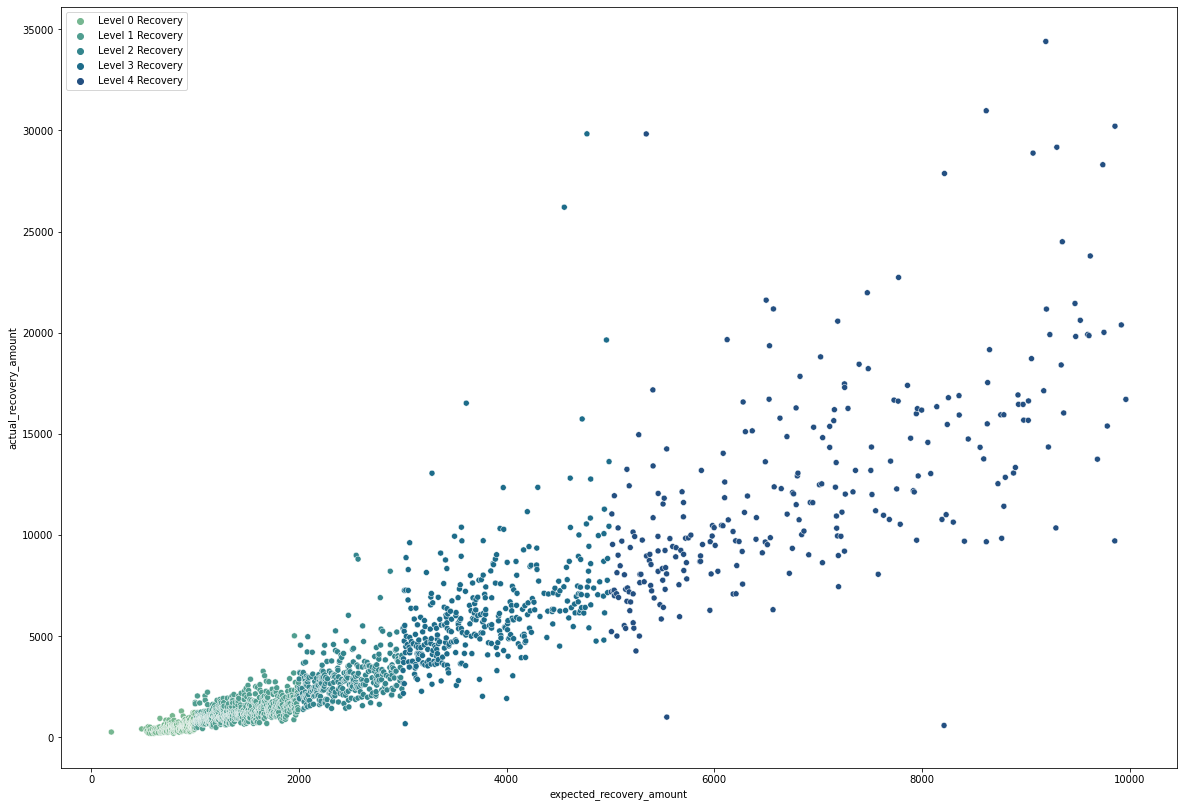

In [44]:
# scatterplot between expected and actual recovery amount
fig, ax = plt.subplots(figsize=(20,14))
sns.scatterplot(data=df, x='expected_recovery_amount', y='actual_recovery_amount', ax=ax, 
               hue='recovery_strategy', palette='crest')
plt.legend(loc='upper left')
plt.show()

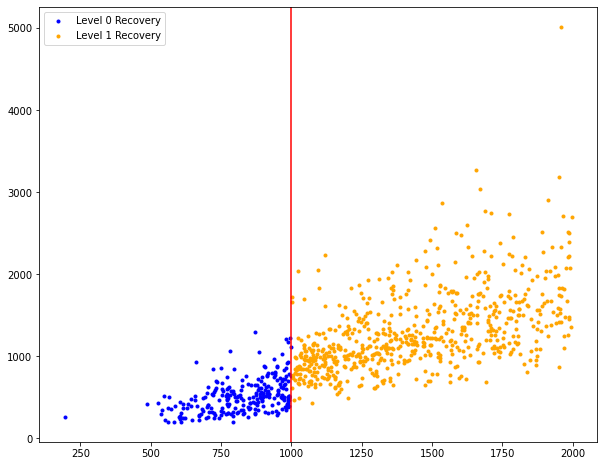

In [53]:
# visualize discontinuty between Level 0 & 1
fig, ax = plt.subplots(figsize=(10,8))

strat_color = [('Level 0 Recovery','blue'), ('Level 1 Recovery','orange')]

for s,c in strat_color:
    data = df[df.recovery_strategy == s]
    ax.scatter(data.expected_recovery_amount, data.actual_recovery_amount, marker='.', color=c, label=s)

ax.axvline(x=1000, color='r')    
    
plt.legend()
plt.show()


# df_cat01 = df[df.recovery_strategy.isin(['Level 0 Recovery', 'Level 1 Recovery'])]
# sns.scatterplot(data=df_cat01, x='expected_recovery_amount', y='actual_recovery_amount', ax=ax, 
#                hue='recovery_strategy', palette='crest')

# plt.show()

In [ ]:
# not that different
# clarify that both sex and age is not that different between lv 0 & 1
# though it's quite similar based on our graphical EDA
# let's do a statistical test
    # two samples stats

# Age

# null hyp: no difference

# test statistic is the mean difference

# calculate observed difference

# do permutation tests and genereate bootstrap replicates

# compare

LinregressResult(slope=2.0476571209906664, intercept=-1650.4994474543887, rvalue=0.9037269769221347, pvalue=0.0, stderr=0.02237153076939497, intercept_stderr=76.5059013809075)

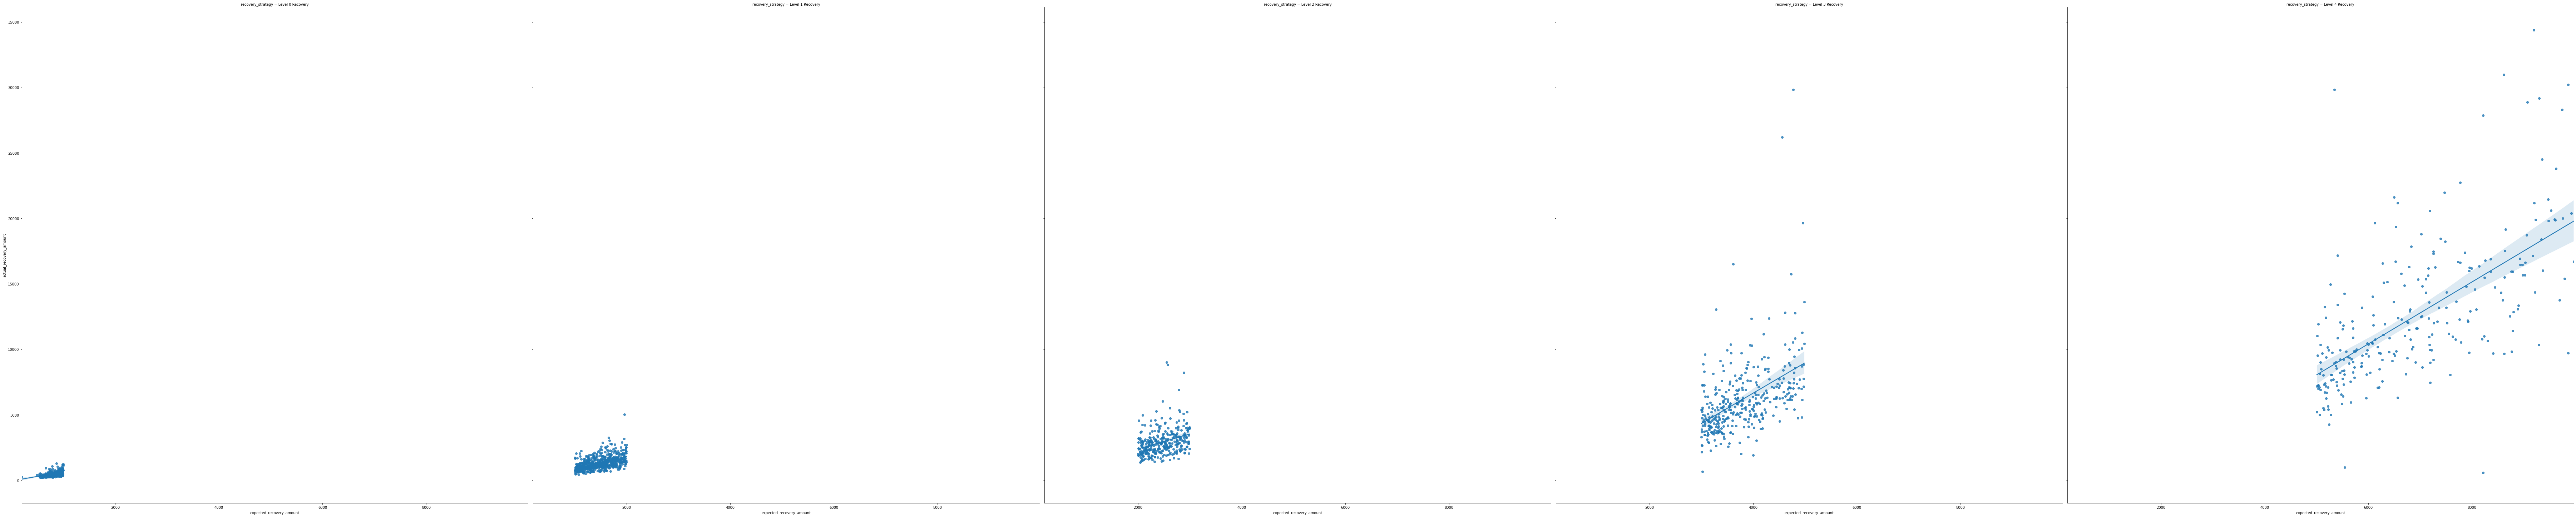

In [38]:
# seems to have a linear relationship, let's quantify it
from scipy.stats import linregress

reg_mod = linregress(df.expected_recovery_amount, df.actual_recovery_amount)
display(reg_mod)

# visualize with lmplot
# fig, ax = plt.subplots(figsize=(10,8))

sns.lmplot(data=df, x='expected_recovery_amount', y='actual_recovery_amount',col='recovery_strategy',
          height=20, aspect=1)
plt.show()